# Telco Project
## Author: Shuo Xu

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Matplotlib is building the font cache; this may take a moment.


#### Import Data

In [37]:
df = pd.read_excel("Telco.xlsx")

In [38]:
print("This dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

This dataset has 7043 rows and 33 columns.


#### Other than Churn Reason, this data set does not have missing values.

In [39]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

#### Explore the data

In [41]:
print("All observations are within {}.".format(df.Country.unique()))

All observations are within ['United States'].


In [42]:
print("All observations are within {}.".format(df.State.unique()))

All observations are within ['California'].


In [85]:
Total_Churn_Rate = round(df['Churn Value'].value_counts()[1]/(df['Churn Value'].value_counts()[0]+df['Churn Value'].value_counts()[1])*100,2)
print("{} percent of observations churn from the company.".format(Total_Churn_Rate))
print("We have an inbalanced dataset.")

26.54 percent of observations churn from the company.
We have an inbalanced dataset.


### Reminder: 'Churn' means a customer left the company in "THIS" quarter. The customer can come back in the future.

#### Let's look at how the churn rates are differed by each feature.

In [200]:
def Churn_Rate_By_Sector(sector):
    sector_dictionary = {}
    sector_list = [x for x in df[sector].unique()]
    for s in sector_list:
        value_counts = df[df[sector]==s]['Churn Value'].value_counts()
        if len(value_counts)==2:
            if value_counts.index[0]==1:
                churn = value_counts[0]
                not_churn = value_counts[1]
                rate = round(churn/(churn+not_churn),2)
            else:
                churn = value_counts[1]
                not_churn = value_counts[0]
                rate = round(churn/(churn+not_churn),2)
        else:
            if value_counts.index[0]==0:
                rate = 0
            else:
                rate = 1
        sector_dictionary[s] = rate
    return sector_dictionary

#### Female customers have slightly higher churn rates.

<BarContainer object of 2 artists>

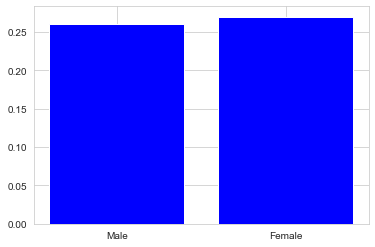

In [202]:
myDictionary = Churn_Rate_By_Sector('Gender')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Senior customers have higher churn rates.

<BarContainer object of 2 artists>

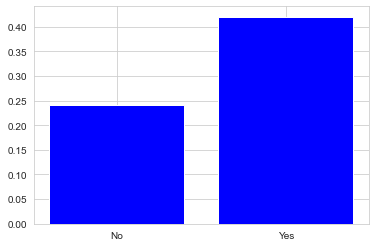

In [203]:
myDictionary = Churn_Rate_By_Sector('Senior Citizen')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who are single have higher churn rates.

<BarContainer object of 2 artists>

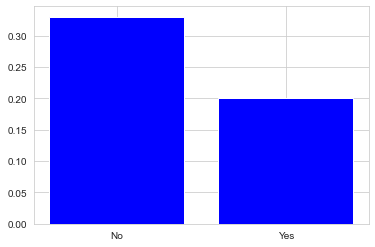

In [204]:
myDictionary = Churn_Rate_By_Sector('Partner')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not have dependent have higher churn rates.

<BarContainer object of 2 artists>

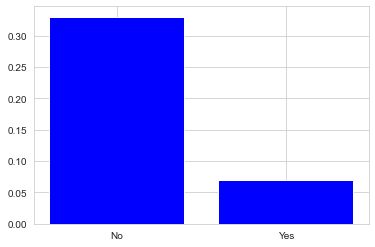

In [205]:
myDictionary = Churn_Rate_By_Sector('Dependents')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers with a Month-to-month contract have higher churn rates

<BarContainer object of 3 artists>

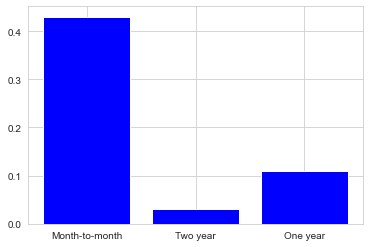

In [206]:
myDictionary = Churn_Rate_By_Sector('Contract')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers with shorter Tenure Months have higher churn rates.

<BarContainer object of 73 artists>

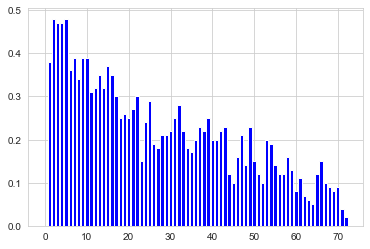

In [207]:
myDictionary = Churn_Rate_By_Sector('Tenure Months')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who subscribe phone service have higher churn rates.

<BarContainer object of 2 artists>

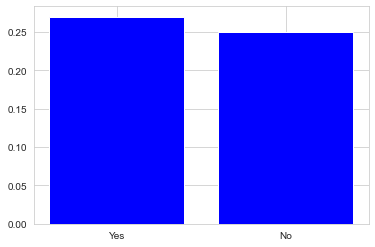

In [208]:
myDictionary = Churn_Rate_By_Sector('Phone Service')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who subscribe multiple phone services have higher churn rates. This explain the driving force of the above graph.

<BarContainer object of 3 artists>

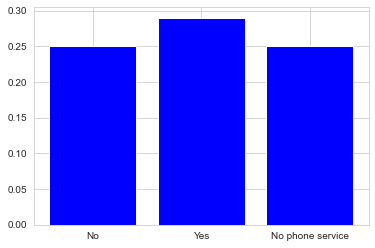

In [209]:
myDictionary = Churn_Rate_By_Sector('Multiple Lines')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who subscribe Fiber Optic Internet Service have higher churn rates.

<BarContainer object of 3 artists>

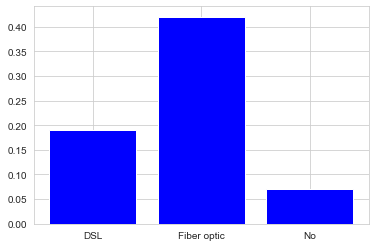

In [210]:
myDictionary = Churn_Rate_By_Sector('Internet Service')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Among customers who subscribe internet services, customer who do not subscribe to online security have higher churn rates.

<BarContainer object of 3 artists>

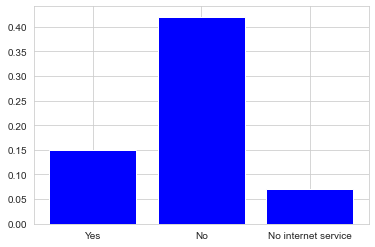

In [213]:
myDictionary = Churn_Rate_By_Sector('Online Security')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Among customers who subscribe internet services, customers who do not subscribe to online backup have higher churn rates.

<BarContainer object of 3 artists>

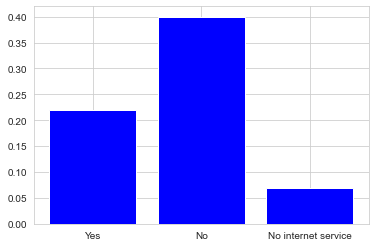

In [215]:
myDictionary = Churn_Rate_By_Sector('Online Backup')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not subscribe to additional device protection plan have higher churn rates.

<BarContainer object of 3 artists>

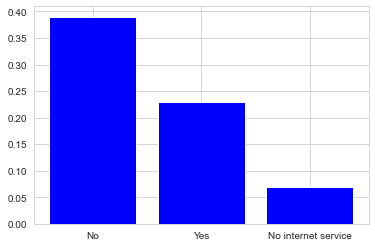

In [216]:
myDictionary = Churn_Rate_By_Sector('Device Protection')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not subscribe to tech support have higher churn rates.

<BarContainer object of 3 artists>

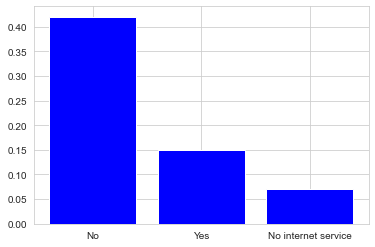

In [217]:
myDictionary = Churn_Rate_By_Sector('Tech Support')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not use internet to stream TV have higher churn rates.

<BarContainer object of 3 artists>

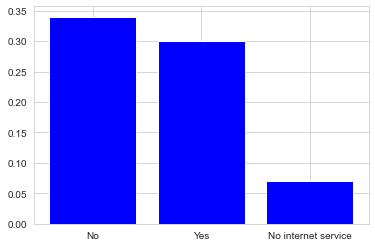

In [218]:
myDictionary = Churn_Rate_By_Sector('Streaming TV')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who do not use internet to stream Movies have higher churn rates.

<BarContainer object of 3 artists>

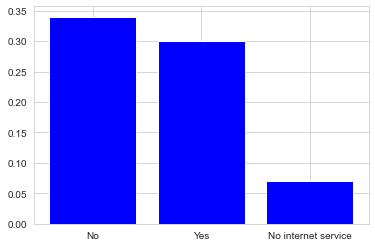

In [219]:
myDictionary = Churn_Rate_By_Sector('Streaming Movies')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who use paperless billing have higher churn rates.

<BarContainer object of 2 artists>

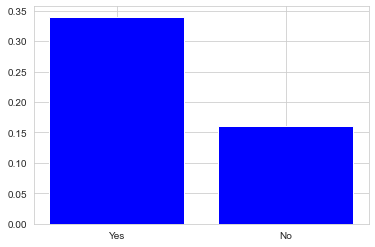

In [221]:
myDictionary = Churn_Rate_By_Sector('Paperless Billing')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')

#### Customers who pay in electronic check have higher churn rates.

<BarContainer object of 4 artists>

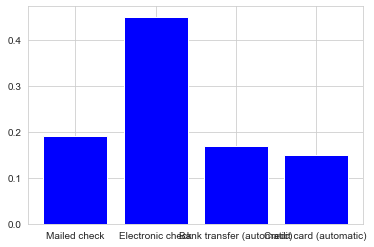

In [223]:
myDictionary = Churn_Rate_By_Sector('Payment Method')
plt.bar(myDictionary.keys(), myDictionary.values(), color='blue')